# Final project: Time-series data and application to stock markets {-}

This project aims at familiarizing you with time-series data analysis and its application to stock markets. Datasets you will be working on are Nasdaq and Vietnam stock datasets.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-project-notebook.ipynb: Jupyter notebook containing source code.
- ./\<StudentID>-project-report.pdf: project report.

The submission folder is named DL4AI-\<StudentID>-project (e.g., DL4AI-2012345-project) and then compressed with the same name.
    
### Evaluation {-}
Project evaluation will be conducted on how you accomplish the assignment requirements. You can refer to the project instruction slide deck for details.

### Deadline {-}
Please visit Canvas for details.

heheehehe

# Importing libraries

In [197]:
import csv
import os 
import shutil
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM, Dense

from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

# Extracting data with more than 120 historical data points
Có use nhưng include thẳng file đã filter lên github chứ không để user phải chạy

NASDAQ

In [58]:
# # set directory path
# dir_path = "data-nasdaq/csv"
# folder_path = 'filtered-data-nasdaq'

# # use os.makedirs() to create the new folder and any missing parent folders
# os.makedirs(folder_path)

# # loop through files in directory
# for filename in os.listdir(dir_path):
#     if filename.endswith('.csv'):  # only process CSV files
#         filepath = os.path.join(dir_path, filename)
#         with open(filepath) as f:
#             reader = csv.reader(f)
#             row_count = sum(1 for row in reader)
#         if row_count >= 120:
#             shutil.copy(filepath, folder_path)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'filtered-data-nasdaq'

Vietnam

In [ ]:
# # set directory path
# dir_path = "data-vn-20230228/stock-historical-data"
# folder_path = 'filtered-data-vn-20230228'
# sub_folder_path = 'filtered-data-vn-20230228/stock-historical-data'

# os.makedirs(folder_path)
# os.makedirs(sub_folder_path)

# # loop through files in directory
# for filename in os.listdir(dir_path):
#     if filename.endswith('.csv'):  # only process CSV files
#         filepath = os.path.join(dir_path, filename)
#         with open(filepath) as f:
#             reader = csv.reader(f)
#             row_count = sum(1 for row in reader)
#         if row_count >= 120:
#             shutil.copy(filepath, sub_folder_path)

# Industrial extracting
Tới giờ chưa use :)))

NASDAQ

In [ ]:
# folder_path = 'filtered-data-nasdaq/data-industrial'
# dir_path = 'filtered-data-nasdaq'

# os.makedirs(folder_path)

# sector_data = pd.read_csv('nasdaq_screener_1680619758572.csv')

# for filename in os.listdir(dir_path):
#     for i in range(len(sector_data)):
#         if sector_data.loc[i, 'Sector'] == 'Industrials' and sector_data.loc[i, 'Symbol'] in filename:
#             filepath = os.path.join(dir_path, filename)
#             shutil.copy(filepath, folder_path)

Vietnam

In [ ]:
# folder_path = 'filtered-data-vn-20230228/stock-historical-data/data-industrial'
# dir_path = 'filtered-data-vn-20230228/stock-historical-data'

# os.makedirs(folder_path)

# sector_data = pd.read_csv('data-vn-20230228/ticker-overview.csv')

# for filename in os.listdir(dir_path):
#     for i in range(len(sector_data)):
#         if sector_data.loc[i,'industryEn'] == 'Industrial Goods & Services' and (sector_data.loc[i,'ticker'] + '-') in filename:
#             filepath = os.path.join(dir_path, filename)
#             shutil.copy(filepath, folder_path)

# Real Estate Extracting
Tới giờ chưa use :)))

NASDAQ

In [ ]:
# # Define the paths to the files and folders
# folder_path = 'filtered-data-nasdaq/data-real-estate'
# dir_path = 'filtered-data-nasdaq'

# os.makedirs(folder_path)

# sector_data = pd.read_csv('nasdaq_screener_1680619758572.csv')

# for filename in os.listdir(dir_path):
#     for i in range(len(sector_data)):
#         if sector_data.loc[i, 'Sector'] == 'Real Estate' and sector_data.loc[i, 'Symbol'] in filename:
#             filepath = os.path.join(dir_path, filename)
#             shutil.copy(filepath, folder_path)

Vietnam

In [ ]:
# folder_path = 'filtered-data-vn-20230228/stock-historical-data/data-real-estate'
# dir_path = 'filtered-data-vn-20230228/stock-historical-data'

# os.makedirs(folder_path)

# sector_data = pd.read_csv('data-vn-20230228/ticker-overview.csv')

# for filename in os.listdir(dir_path):
#     for i in range(len(sector_data)):
#         if sector_data.loc[i,'industryEn'] == 'Real Estate' and (sector_data.loc[i,'ticker'] + '-') in filename:
#             filepath = os.path.join(dir_path, filename)
#             shutil.copy(filepath, folder_path)

# Industrial training - AAON

In [123]:
data_industrial_aaon = pd.read_csv('filtered-data-nasdaq/data-industrial/AAON.csv')
data_industrial_aaon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7553 entries, 0 to 7552
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7553 non-null   object 
 1   Low             7553 non-null   float64
 2   Open            7553 non-null   float64
 3   Volume          7553 non-null   int64  
 4   High            7553 non-null   float64
 5   Close           7553 non-null   float64
 6   Adjusted Close  7553 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 413.2+ KB


In [124]:
data_industrial_aaon.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,16-12-1992,0.099763,0.099763,2506,0.099763,0.099763,0.083214
1,17-12-1992,0.099763,0.119716,164139,0.129692,0.119716,0.099857
2,18-12-1992,0.119716,0.119716,15036,0.119716,0.119716,0.099857
3,21-12-1992,0.089787,0.099763,33830,0.099763,0.099763,0.083214
4,22-12-1992,0.099763,0.099763,62648,0.119716,0.119716,0.099857


In [125]:
df = data_industrial_aaon

X_data = []
y_data = []
window_size = 7

for i in range(1, len(df) - window_size - 1):
    first = df.iloc[i, 5]
    data_feature = []
    data_label = []
    
    # Get a window_size time frame for data feature
    for j in range(window_size):
        data_feature.append(df.iloc[i + j, 5])
        
    # Next value is the label (price of the next day) to be predicted
    data_label.append(df.iloc[i + window_size, 5])
    
    # Append new data sample (feature and label) to X_data and y_data
    X_data.append(np.array(data_feature).reshape(window_size, 1))
    y_data.append(np.array(data_label))

## Chia data theo interval
Có trên gg colab

In [213]:
# data_close = df['Close'].values.reshape(-1,1)
# data_close.shape

(7553, 1)

In [214]:
# # Define input sequences and corresponding outputs
# def create_sequences(data, seq_length, interval):
#     X = []
#     y = []
#     for i in range(seq_length, len(data)-interval):
#         X.append(data[i-seq_length:i])
#         y.append(data[i+interval-1])
#     return np.array(X), np.array(y)

In [215]:
# daily = 1
# weekly = 5
# monthly = 22

# # Create input sequences and corresponding outputs
# X_daily, y_daily = create_sequences(data_close, seq_length=30, interval=daily)
# X_weekly, y_weekly = create_sequences(data_close, seq_length=150, interval=weekly)
# X_monthly, y_monthly = create_sequences(data_close, seq_length=660, interval=monthly)

# # Split data into train, val and test sets. Note that 'shuffle=False' due to time-series data.
# X_daily_train, X_daily_test, y_daily_train, y_daily_test = train_test_split(X_daily, y_daily, test_size=0.2, shuffle=False)
# X_daily_train, X_daily_val, y_daily_train, y_daily_val = train_test_split(X_daily_train, y_daily_train, test_size=0.2, shuffle=False)
    
# X_weekly_train, X_weekly_test, y_weekly_train, y_weekly_test = train_test_split(X_weekly, y_weekly, test_size=0.2, shuffle=False)
# X_weekly_train, X_weekly_val, y_weekly_train, y_weekly_val = train_test_split(X_weekly_train, y_weekly_train, test_size=0.2, shuffle=False)
# X_monthly_train, X_monthly_test, y_monthly_train, y_monthly_test = train_test_split(X_monthly, y_monthly, test_size=0.2, shuffle=False)
# X_monthly_train, X_monthly_val, y_monthly_train, y_monthly_val = train_test_split(X_monthly_train, y_monthly_train, test_size=0.2, shuffle=False)
    
# # Convert from lists to Numpy arrays for reshaping purpose
# X_daily_train = np.array(X_daily_train)
# X_daily_val = np.array(X_daily_val)
# X_daily_test = np.array(X_daily_test)
# y_daily_train = np.array(y_daily_train)
# y_daily_val = np.array(y_daily_val)
# y_daily_test = np.array(y_daily_test)

# X_weekly_train = np.array(X_weekly_train)
# X_weekly_val = np.array(X_weekly_val)
# X_weekly_test = np.array(X_weekly_test)
# y_weekly_train = np.array(y_weekly_train)
# y_weekly_val = np.array(y_weekly_val)
# y_weekly_test = np.array(y_weekly_test)
    
# X_monthly_train = np.array(X_monthly_train)
# X_monthly_val = np.array(X_monthly_val)
# X_monthly_test = np.array(X_monthly_test)
# y_monthly_train = np.array(y_monthly_train)
# y_monthly_val = np.array(y_monthly_val)
# y_monthly_test = np.array(y_monthly_test)

### Normalization

Daily

In [216]:
# # MinMax normalize the training data: x=(x-min(x)/(max(x)-min(x))
# X_daily_train_norm = X_daily_train.copy()
# y_daily_train_norm = y_daily_train.copy()
# for i in range(0, len(X_daily_train)):
#     min_feature = np.min(X_daily_train[i])
#     max_feature = np.max(X_daily_train[i])
#     X_daily_train_norm[i] = (X_daily_train[i] - min_feature) / (max_feature - min_feature)
#     y_daily_train_norm[i] = (y_daily_train[i] - min_feature) / (max_feature - min_feature)

# # MinMax normalize the validation data: x=(x-min(x)/(max(x)-min(x))
# X_daily_val_norm = X_daily_val.copy()
# y_daily_val_norm = y_daily_val.copy()
# for i in range(0, len(X_daily_val)):
#     min_feature = np.min(X_daily_val[i])
#     max_feature = np.max(X_daily_val[i])
#     X_daily_val_norm[i] = (X_daily_val[i] - min_feature) / (max_feature - min_feature)
#     y_daily_val_norm[i] = (y_daily_val[i] - min_feature) / (max_feature - min_feature)

# # MinMax normalize the test data: norm_x = (x-min(x) / (max(x) - min(x))
# X_daily_test_norm = X_daily_test.copy()
# y_daily_test_norm = y_daily_test.copy()
# for i in range(0, len(X_daily_test)):
#     min_feature = np.min(X_daily_test[i])
#     max_feature = np.max(X_daily_test[i])
#     X_daily_test_norm[i] = (X_daily_test[i] - min_feature) / (max_feature - min_feature)
#     y_daily_test_norm[i] = (y_daily_test[i] - min_feature) / (max_feature - min_feature)

Monthly

In [217]:
# # MinMax normalize the training data: x=(x-min(x)/(max(x)-min(x))
# X_monthly_train_norm = X_monthly_train.copy()
# y_monthly_train_norm = y_monthly_train.copy()
# for i in range(0, len(X_monthly_train)):
#     min_feature = np.min(X_monthly_train[i])
#     max_feature = np.max(X_monthly_train[i])
#     X_monthly_train_norm[i] = (X_monthly_train[i] - min_feature) / (max_feature - min_feature)
#     y_monthly_train_norm[i] = (y_monthly_train[i] - min_feature) / (max_feature - min_feature)

# # MinMax normalize the validation data: x=(x-min(x)/(max(x)-min(x))
# X_monthly_val_norm = X_monthly_val.copy()
# y_monthly_val_norm = y_monthly_val.copy()
# for i in range(0, len(X_monthly_val)):
#     min_feature = np.min(X_monthly_val[i])
#     max_feature = np.max(X_monthly_val[i])
#     X_monthly_val_norm[i] = (X_monthly_val[i] - min_feature) / (max_feature - min_feature)
#     y_monthly_val_norm[i] = (y_monthly_val[i] - min_feature) / (max_feature - min_feature)

# X_monthly_test_norm = X_monthly_test.copy()
# y_monthly_test_norm = y_monthly_test.copy()
# for i in range(0, len(X_monthly_test)):
#     min_feature = np.min(X_monthly_test[i])
#     max_feature = np.max(X_monthly_test[i])
#     X_monthly_test_norm[i] = (X_monthly_test[i] - min_feature) / (max_feature - min_feature)
#     y_monthly_test_norm[i] = (y_monthly_test[i] - min_feature) / (max_feature - min_feature)

Weekly

In [218]:
# # MinMax normalize the training data: x=(x-min(x)/(max(x)-min(x))
# X_weekly_train_norm = X_weekly_train.copy()
# y_weekly_train_norm = y_weekly_train.copy()
# for i in range(0, len(X_weekly_train)):
#     min_feature = np.min(X_weekly_train[i])
#     max_feature = np.max(X_weekly_train[i])
#     X_weekly_train_norm[i] = (X_weekly_train[i] - min_feature) / (max_feature - min_feature)
#     y_weekly_train_norm[i] = (y_weekly_train[i] - min_feature) / (max_feature - min_feature)

# # MinMax normalize the validation data: x=(x-min(x)/(max(x)-min(x))
# X_weekly_val_norm = X_weekly_val.copy()
# y_weekly_val_norm = y_weekly_val.copy()
# for i in range(0, len(X_weekly_val)):
#     min_feature = np.min(X_weekly_val[i])
#     max_feature = np.max(X_weekly_val[i])
#     X_weekly_val_norm[i] = (X_weekly_val[i] - min_feature) / (max_feature - min_feature)
#     y_weekly_val_norm[i] = (y_weekly_val[i] - min_feature) / (max_feature - min_feature)

# X_weekly_test_norm = X_weekly_test.copy()
# y_weekly_test_norm = y_weekly_test.copy()
# for i in range(0, len(X_weekly_test)):
#     min_feature = np.min(X_weekly_test[i])
#     max_feature = np.max(X_weekly_test[i])
#     X_weekly_test_norm[i] = (X_weekly_test[i] - min_feature) / (max_feature - min_feature)
#     y_weekly_test_norm[i] = (y_weekly_test[i] - min_feature) / (max_feature - min_feature)

### Train

In [223]:
# # Build LSTM models
# model_daily = Sequential()
# model_daily.add(LSTM(64, input_shape=(X_daily.shape[1], X_daily.shape[2]), activation='relu'))
# model_daily.add(Dense(1))
# model_daily.compile(loss='mse', optimizer='adam')

# model_weekly = Sequential()
# model_weekly.add(LSTM(64, input_shape=(X_weekly.shape[1], X_weekly.shape[2]), activation='relu'))
# model_weekly.add(Dense(1))
# model_weekly.compile(loss='mse', optimizer='adam')

# model_monthly = Sequential()
# model_monthly.add(LSTM(64, input_shape=(X_monthly.shape[1], X_monthly.shape[2]), activation='relu'))
# model_monthly.add(Dense(1))
# model_monthly.compile(loss='mse', optimizer='adam')
    
# # Train LSTM models    
# model_daily.fit(X_daily, y_daily, epochs=50, batch_size=32)
# model_weekly.fit(X_weekly, y_weekly, epochs=50, batch_size=32)
# model_monthly.fit(X_monthly, y_monthly, epochs=50, batch_size=32)

Epoch 1/50
236/236 [==============================] - 4s 12ms/step - loss: 85.9888
Epoch 2/50
236/236 [==============================] - 3s 13ms/step - loss: 0.9217
Epoch 3/50
236/236 [==============================] - 3s 12ms/step - loss: 0.7916
Epoch 4/50
236/236 [==============================] - 3s 14ms/step - loss: 0.5385
Epoch 5/50
236/236 [==============================] - 3s 13ms/step - loss: 0.4948
Epoch 6/50
236/236 [==============================] - 3s 12ms/step - loss: 0.4358
Epoch 7/50
236/236 [==============================] - 3s 13ms/step - loss: 0.4899
Epoch 8/50
236/236 [==============================] - 3s 12ms/step - loss: 0.4770
Epoch 9/50
236/236 [==============================] - 3s 12ms/step - loss: 0.4100
Epoch 10/50
236/236 [==============================] - 3s 13ms/step - loss: 0.4343
Epoch 11/50
236/236 [==============================] - 3s 15ms/step - loss: 0.4744
Epoch 12/50
236/236 [==============================] - 3s 13ms/step - loss: 0.4059
Epoch 13/50


KeyboardInterrupt: 

### Predict

In [ ]:
# y_daily_pred_norm = model_daily.predict(X_daily_test_norm)
# y_weekly_pred_norm = model_daily.predict(X_weekly_test_norm)
# y_monthly_pred_norm = model_daily.predict(X_monthly_test_norm)

## Chia data không theo interval

In [126]:
### Split the data into training, validation and test set

# Import the library
from sklearn.model_selection import train_test_split

# Split data into train, val and test. Note that 'shuffle=False' due to time-series data.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

# Convert from lists to Numpy arrays for reshaping purpose
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Reshape the numpy array to fit the neural network input shape requirement
X_train = X_train.reshape(X_train.shape[0], window_size, 1)
X_val = X_val.reshape(X_val.shape[0], window_size, 1)
X_test = X_test.reshape(X_test.shape[0], window_size, 1)

# Print shape of the training, validation and test set
print("Shape of training set: ", X_train.shape)
print("Shape of validation set: ", X_val.shape)
print("Shape of test set: ", X_test.shape)

Shape of training set:  (4828, 7, 1)
Shape of validation set:  (1207, 7, 1)
Shape of test set:  (1509, 7, 1)


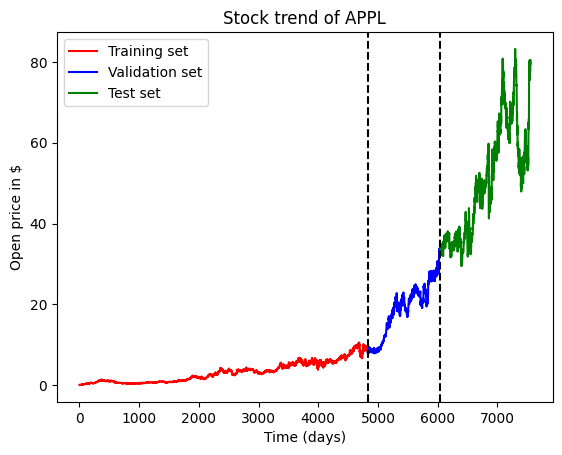

In [127]:
# Visualize the training, validation and test set
df_plot = df['Close']
df_plot = df_plot.reset_index(drop=False)

# Get lengths of the three subsets
size_train = X_train.shape[0]
size_val = X_val.shape[0]
size_test = X_test.shape[0]

# Plot the subset splits
ax = df_plot.iloc[:size_train,1:2].plot(y=0, color='red', label='Training set')
df_plot.iloc[size_train:size_train+size_val,1:2].plot(y=0, color='blue', label='Validation set', ax=ax)
df_plot.iloc[size_train+size_val:df_plot.shape[0],1:2].plot(y=0, color='green', label='Test set', ax=ax)
ax.set_title("Stock trend of APPL")
plt.xlabel('Time (days)')
plt.ylabel('Open price in $')
plt.axvline(x=size_train, color='black', linestyle='--')
plt.axvline(x=size_train+size_val, color='black', linestyle='--')
plt.show()

## Normalization

In [191]:
# MinMax normalize the training data: x=(x-min(x)/(max(x)-min(x))
X_train_norm = X_train.copy()
y_train_norm = y_train.copy()
for i in range(0, len(X_train)):
    min_feature = np.min(X_train[i])
    max_feature = np.max(X_train[i])
    X_train_norm[i] = (X_train[i] - min_feature) / (max_feature - min_feature)
    y_train_norm[i] = (y_train[i] - min_feature) / (max_feature - min_feature)

# MinMax normalize the validation data: x=(x-min(x)/(max(x)-min(x))
X_val_norm = X_val.copy()
y_val_norm = y_val.copy()
for i in range(0, len(X_val)):
    min_feature = np.min(X_val[i])
    max_feature = np.max(X_val[i])
    X_val_norm[i] = (X_val[i] - min_feature) / (max_feature - min_feature)
    y_val_norm[i] = (y_val[i] - min_feature) / (max_feature - min_feature)

## Train

In [192]:
model = Sequential()
model.add(LSTM(512, activation='relu', input_shape=(window_size, 1))) # 64 is the number of LSTM units/neurons
model.add(Dense(1)) # Output layer with a single neuron for regression task

# Compile the model
learning_rate = 0.003  # You can adjust this value to set the desired learning rate
optimizer = Adam(lr=learning_rate)
model.compile(optimizer='adam', loss='mse') # Adam optimizer and mean squared error loss

# Train the model
model.fit(X_train, y_train, epochs=32, batch_size=32) # Training for 10 epochs with batch size of 32

Epoch 1/32


c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


151/151 [==============================] - 12s 69ms/step - loss: 0.6765
Epoch 2/32
151/151 [==============================] - 10s 67ms/step - loss: 0.0461
Epoch 3/32
151/151 [==============================] - 10s 65ms/step - loss: 0.0368
Epoch 4/32
151/151 [==============================] - 10s 63ms/step - loss: 0.0334
Epoch 5/32
151/151 [==============================] - 10s 66ms/step - loss: 0.0470
Epoch 6/32
151/151 [==============================] - 11s 73ms/step - loss: 0.0345
Epoch 7/32
151/151 [==============================] - 11s 73ms/step - loss: 0.0339
Epoch 8/32
151/151 [==============================] - 11s 71ms/step - loss: 0.0296
Epoch 9/32
151/151 [==============================] - 13s 89ms/step - loss: 0.0327
Epoch 10/32
151/151 [==============================] - 12s 82ms/step - loss: 0.0307
Epoch 11/32
151/151 [==============================] - 12s 79ms/step - loss: 0.0282
Epoch 12/32
151/151 [==============================] - 12s 82ms/step - loss: 0.0234
Epoch 13/32


In [193]:
# MinMax normalize the test data: norm_x = (x-min(x) / (max(x) - min(x))
X_test_norm = X_test.copy()
y_test_norm = y_test.copy()
for i in range(0, len(X_test)):
    min_feature = np.min(X_test[i])
    max_feature = np.max(X_test[i])
    X_test_norm[i] = (X_test[i] - min_feature) / (max_feature - min_feature)
    y_test_norm[i] = (y_test[i] - min_feature) / (max_feature - min_feature)

In [194]:
# Make predictions
y_pred_norm = model.predict(X_test_norm)

# Print model summary
model.summary()

48/48 [==============================] - 1s 22ms/step
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 512)               1052672   
                                                                 
 dense_23 (Dense)            (None, 1)                 513       
                                                                 
Total params: 1,053,185
Trainable params: 1,053,185
Non-trainable params: 0
_________________________________________________________________


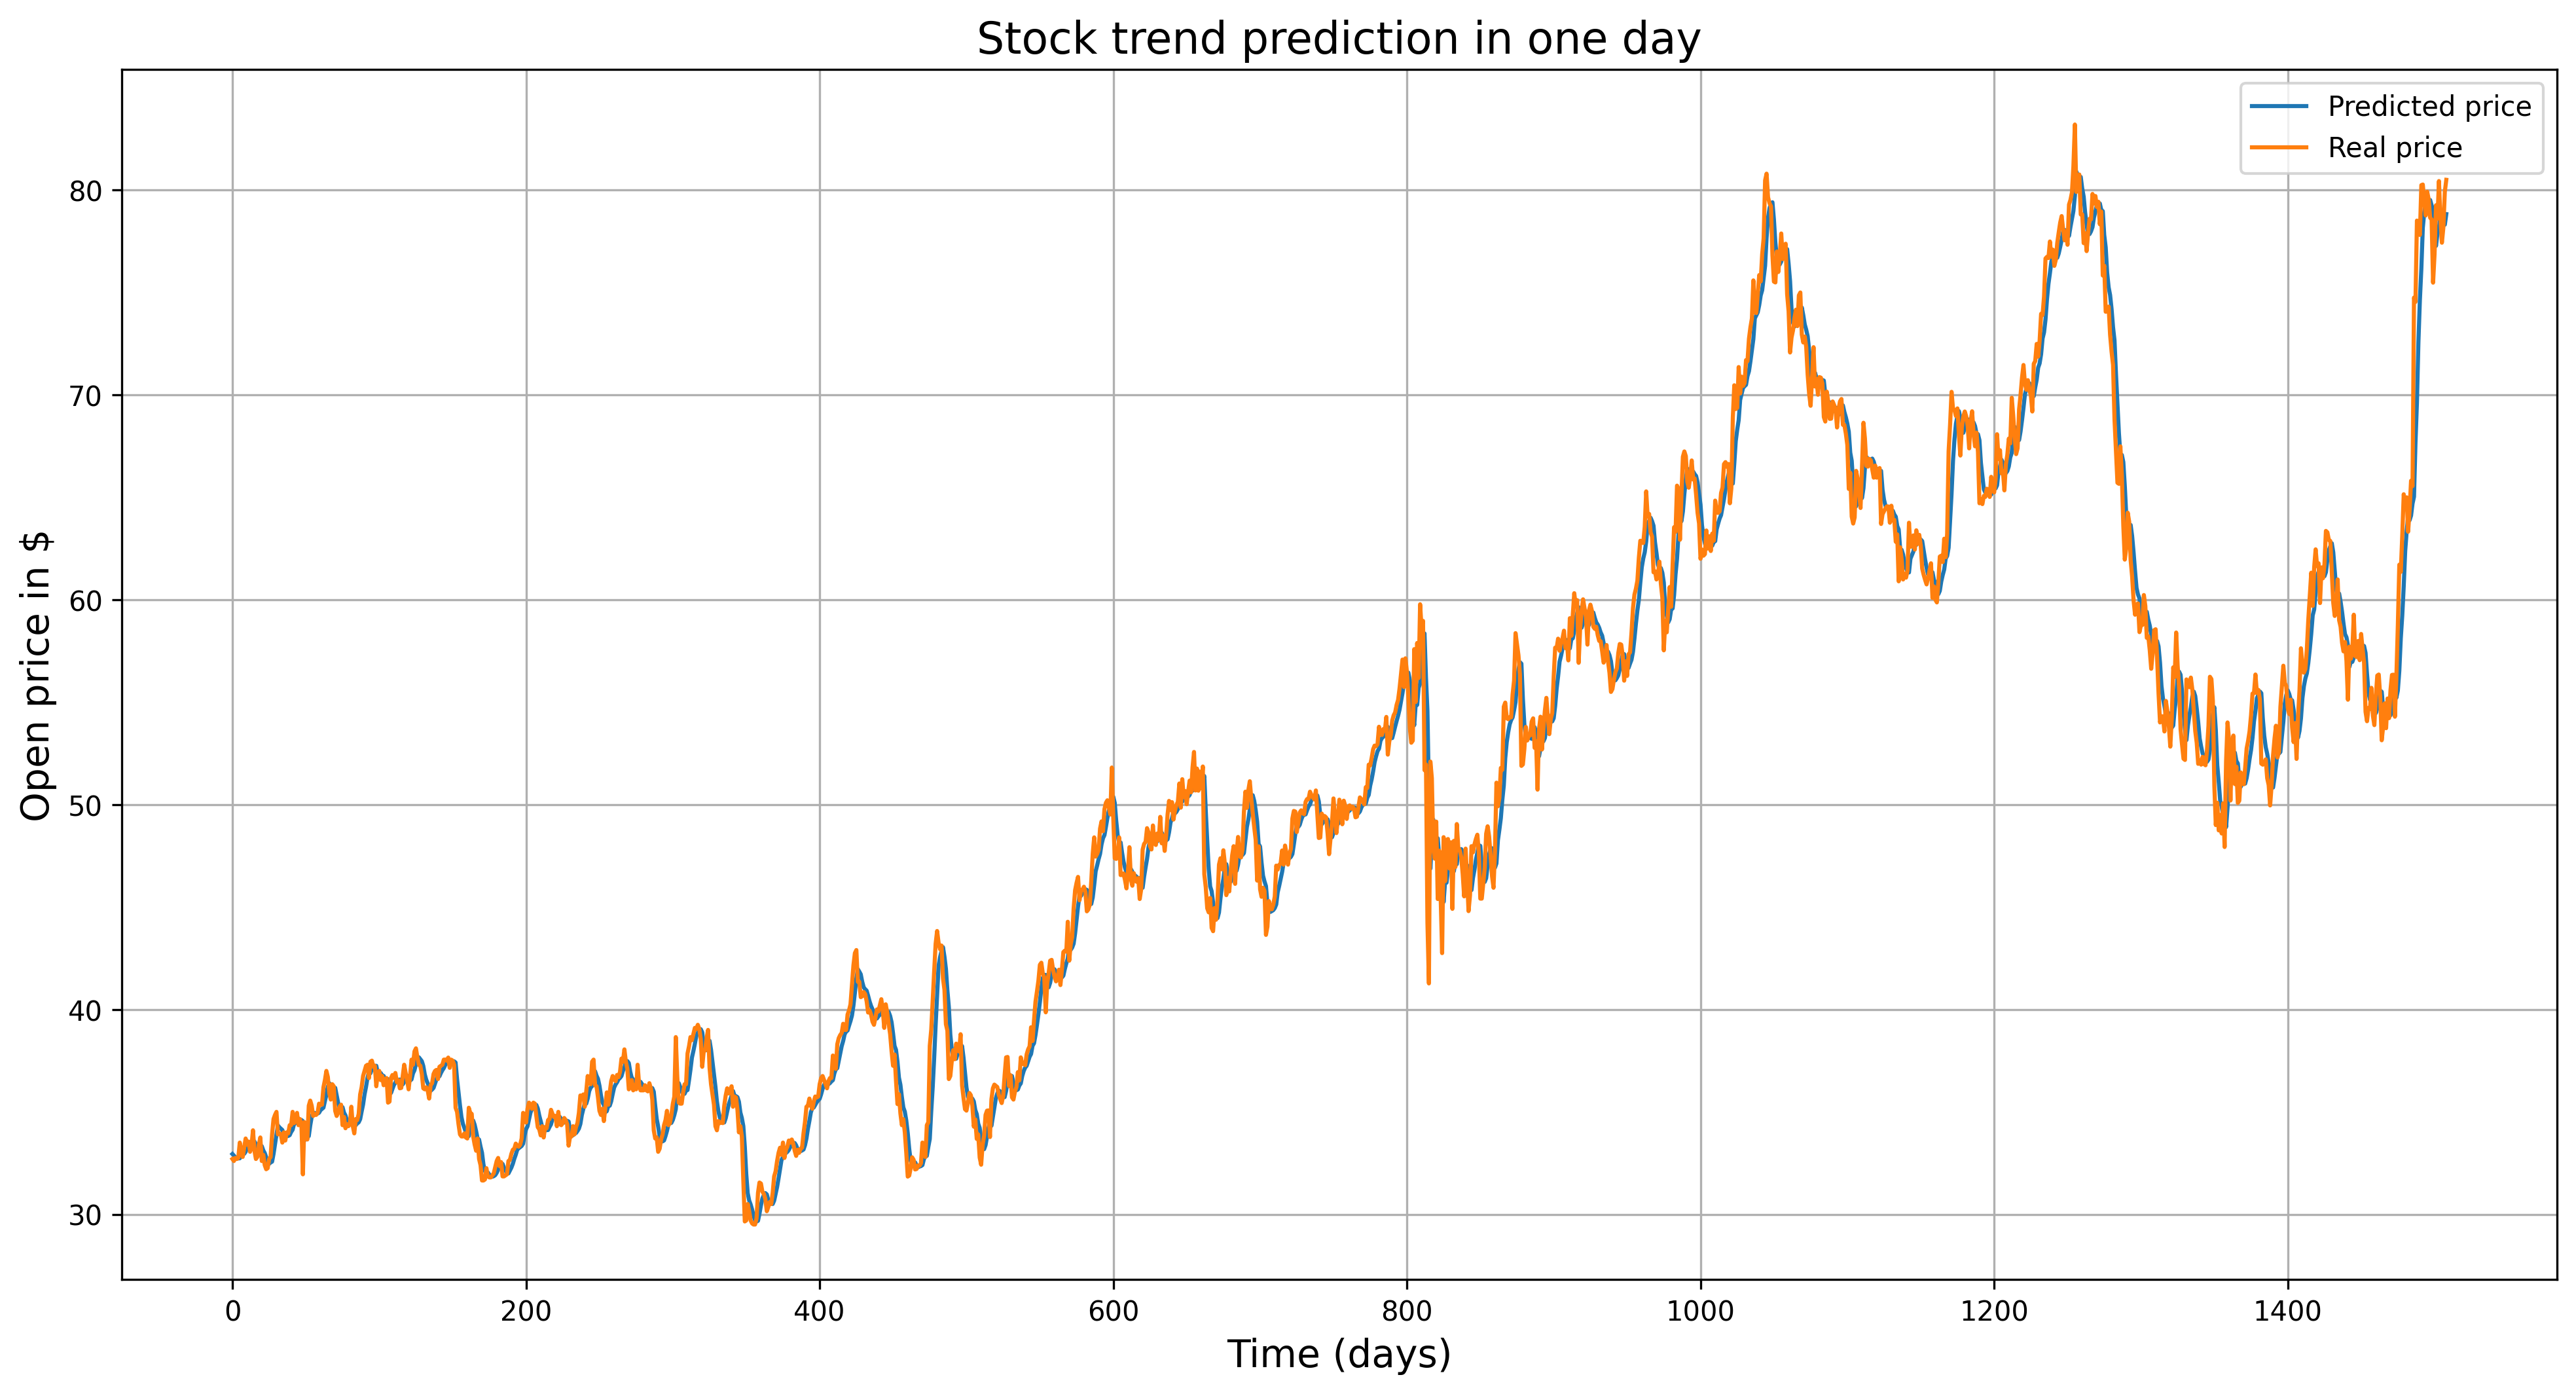

In [195]:
# Convert the result back to stock price (i.e., de-normalization) for visualization purpose
y_pred_denorm = y_pred_norm
for i in range(0, len(y_pred_denorm)): # denorm_x = norm_x * (max(x) - min(x)) + min(x)
    min_feature = np.min(X_test[i])
    max_feature = np.max(X_test[i])
    y_pred_denorm[i] = y_pred_norm[i] * (max_feature - min_feature) + min_feature

# Visualize preditec stock price versus real stock price
plt.figure(figsize=(16, 8), dpi=300)
plt.plot(y_pred_denorm, label='Predicted price')
plt.plot(y_test, label='Real price')
plt.title('Stock trend prediction in one day', fontsize=16)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Open price in $', fontsize=14)
plt.grid() # Add grid
plt.legend() # Add legend
plt.show()

In [196]:
print("MSE on the test set: ", mean_squared_error(y_pred_norm, y_test_norm))
print(model.evaluate(X_test, y_test))

MSE on the test set:  2633.8272030185417
48/48 [==============================] - 1s 19ms/step - loss: 1249.9020
1249.9019775390625
